In [20]:
# import the libraries
import pandas as pd
# import the OS module
import os
import numpy as np
# import torch as torch
import seaborn as sb
import sklearn as sk
import matplotlib.pyplot as plt

# modules used for Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2 # used for LR
from sklearn.metrics import mean_squared_error as mse # used for LR
from sklearn.metrics import explained_variance_score as evs # used for LR
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score as accuracy # for Classification
from sklearn.metrics import confusion_matrix as cm # for Classification
from sklearn.metrics import ConfusionMatrixDisplay as showMatrix # for Classification


# modules used for Classification
import seaborn as sns



# import the dataset for red wine from excel file
filepath = 'winequality-red.csv'
dataset = pd.read_csv(filepath, sep = ';')
dataset.info()
# describe is a descriptive statistics and using the following way makes it easier to compare
dataset.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [21]:
# checking the current working directory
print(os.getcwd())

C:\Users\user\Desktop\UWYO Course Materials\Second sem\Practical Machine Learning\warmup-Sanjeeb-PL


In [22]:
# displaying the data values store in dataset variable
print(dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

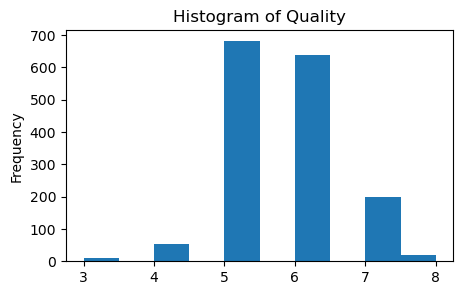

In [23]:
# lets assign quality data to another variable
qual_label = dataset.pop("quality")
display(qual_label)
# plot the histogram
plot = qual_label.plot(kind='hist', title='Histogram of Quality', figsize=(5,3))

In [24]:
# Linear Regression model
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# lets split the data into training and test by using train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, qual_label, train_size=.75, shuffle=True,random_state=0)
x_train.shape, x_test.shape #dimension of the array will be displayed

((1199, 11), (400, 11))

In [25]:
y_test = y_test.to_numpy() # before converting to numpy, the x range of plot was extending up to 1600
lin_reg = LinearRegression().fit(x_train,y_train) # the lin_reg contains the trained model
lin_predict = lin_reg.predict(x_test) # predicted value will be stored in lin_predict
lin_modelscore = lin_reg.score(x_train,y_train) # Return the coefficient of determination of the prediction
lin_R2 = r2(y_test,lin_predict) # R2 score of the model
lin_explained_var = evs(y_test,lin_predict) # explained variance ratio score
lin_mse = mse(y_test,lin_predict) # mse between the predicted value and the true value
print("The Training Accuracy Score of the Regression Model :", lin_modelscore)
print("The R2 Score of the Regression Model :", lin_R2)
print("The Explained Variance Score of the Regression Model :", lin_explained_var)
print("The MSE of the Regression Model :", lin_mse)

The Training Accuracy Score of the Regression Model : 0.3632493675603261
The R2 Score of the Regression Model : 0.34542438124562913
The Explained Variance Score of the Regression Model : 0.35006835112199897
The MSE of the Regression Model : 0.40007252708505425


<Figure size 640x480 with 0 Axes>

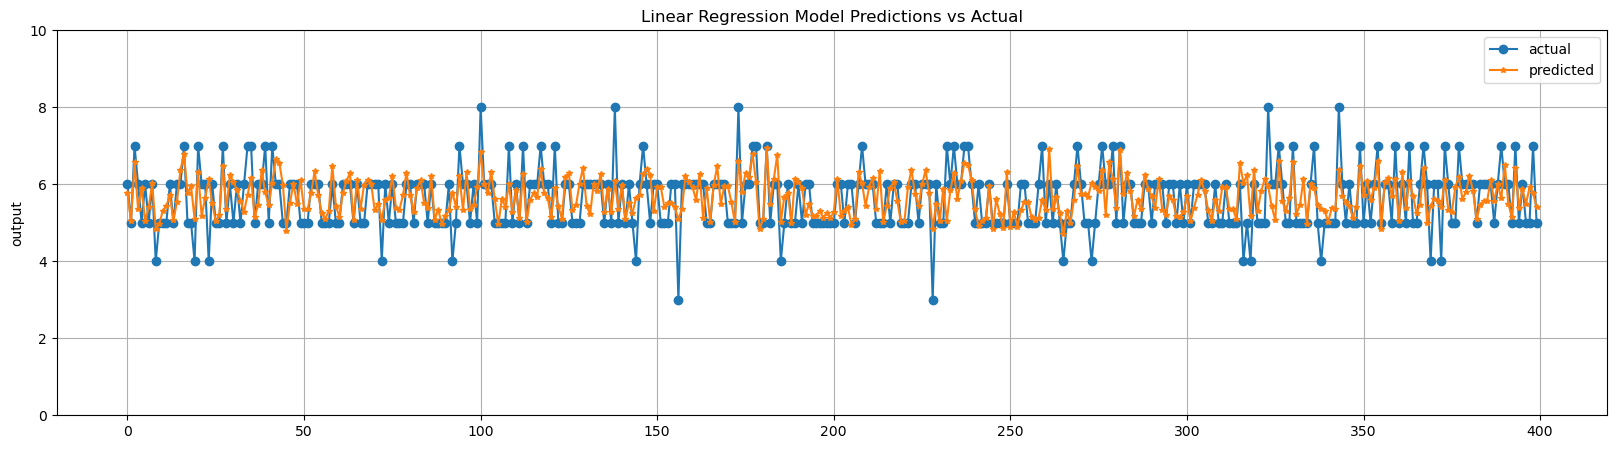

In [26]:
plt.clf()
plt.figure(figsize=(20,5))
plt.title("Linear Regression Model Predictions vs Actual")
plt.plot(y_test, label="actual", marker="o", markersize=6)
plt.plot(lin_predict, label="predicted", marker="*", markersize=4)
plt.ylabel("output")
plt.ylim(0,10)
plt.grid(True)
plt.legend()
plt.show()

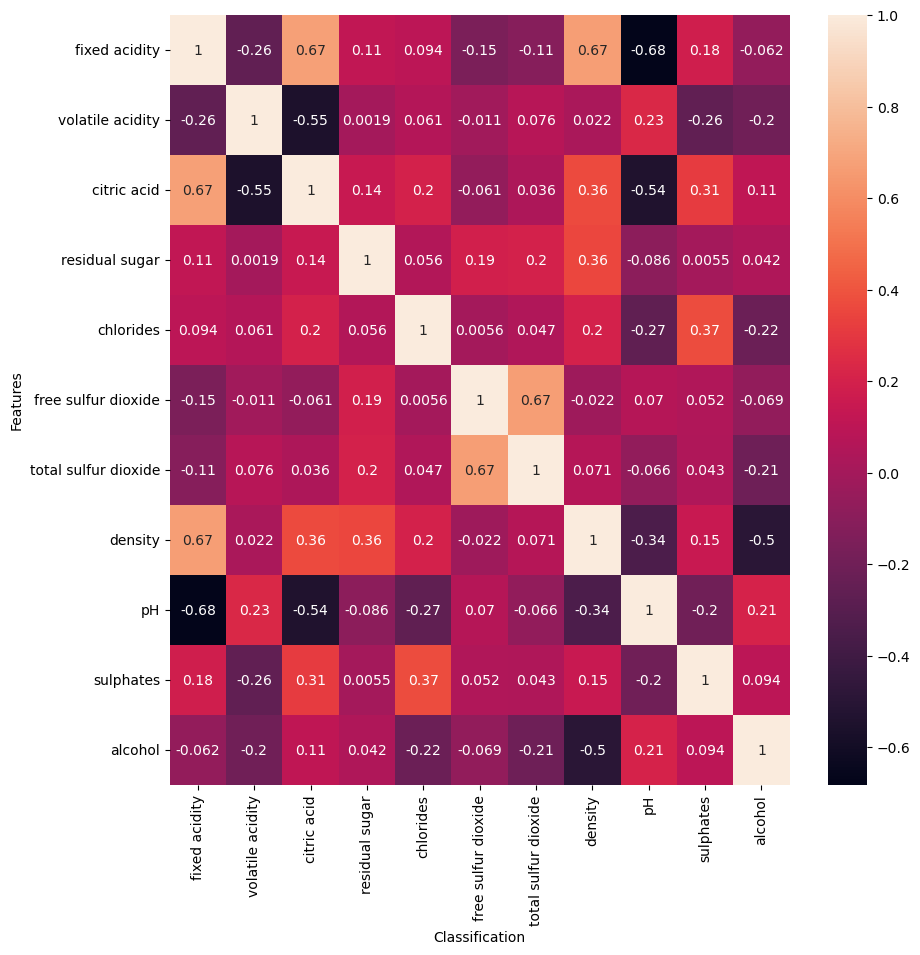

In [27]:
plt.figure(figsize = (10,10))
correlations = dataset[dataset.columns].corr(method='pearson')
plt1=sns.heatmap(correlations, annot = True)
plt1.set(xlabel="Classification",ylabel="Features")
plt.show()

In [28]:
#plt.figure(figsize = (10,10))
#correlations = qual_label[qual_label.columns].corr(method='pearson')
#plt1=sns.heatmap(correlations, annot = True)
#plt1.set(xlabel="Classification",ylabel="Features")
#plt.show()


 Training and Testing Dataset Shape: (1279, 11) (320, 11)
The accuracy of prediction: 0.60625
The Actual values: 75      5
1283    6
408     6
1281    6
1118    6
       ..
890     5
146     5
1551    5
1209    7
1220    6
Name: quality, Length: 320, dtype: int64
The predicted values: [5 5 6 6 7 6 6 5 6 5 6 5 5 7 6 5 6 5 5 5 5 6 5 6 5 6 6 6 5 5 5 6 5 6 5 6 5
 5 6 5 6 5 5 6 5 6 5 5 5 6 5 5 6 5 5 6 6 6 7 5 6 5 5 5 5 5 7 6 5 6 5 6 5 6
 5 5 6 5 5 6 6 5 5 5 6 5 5 6 5 6 5 6 5 6 6 5 6 5 5 6 5 5 5 5 5 5 6 5 6 7 6
 5 6 5 5 7 5 5 5 5 5 7 6 5 5 5 6 5 6 6 6 5 6 5 6 6 5 6 5 5 5 5 5 5 6 6 5 5
 6 6 5 6 5 5 6 6 6 6 6 6 6 5 5 5 6 6 5 5 5 6 5 6 5 5 6 5 5 5 6 5 6 6 6 6 6
 6 6 5 5 5 6 5 5 5 6 5 6 5 5 5 6 6 6 5 7 6 5 5 6 6 5 6 5 6 5 5 5 5 6 5 6 5
 5 5 6 6 5 6 7 6 5 5 6 6 5 5 6 5 6 6 6 6 6 5 5 7 6 5 5 5 5 5 6 6 6 5 5 5 5
 6 6 5 6 5 5 6 6 5 5 6 5 6 5 6 5 6 5 6 5 5 7 6 6 5 5 6 5 5 5 6 5 6 5 5 6 6
 5 6 5 5 6 6 5 6 5 5 5 6 6 5 5 6 6 7 6 6 5 5 6 6]
The Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0   9 

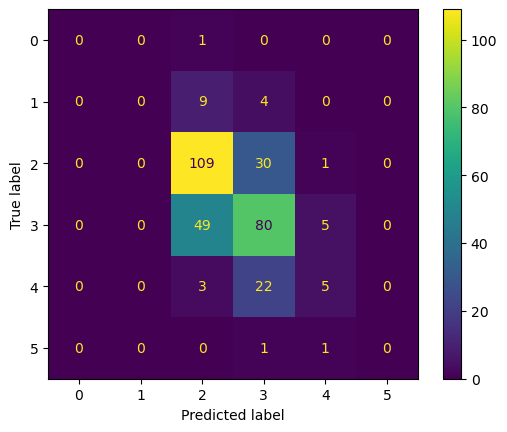

In [31]:
# Classification: Now predict the wine quality as a class, i.e. model the problem as a classification problem.
# Evaluate the performance of your trained model again.
# https://www.tutorialspoint.com/how-to-implement-linear-classification-with-python-scikit-learn
# split the dataset to training and test data using train_test_split function
x_train, x_test, y_train, y_test = train_test_split(dataset, qual_label, train_size=.80, shuffle=True,random_state=1)

#x_train.shape, x_test.shape #dimension of the array will be displayed
print("\n Training and Testing Dataset Shape:",x_train.shape,x_test.shape)
scaler = preprocessing.StandardScaler() # the instance of StandardScaler class
scaler.fit(x_train) # to evaluate mean and SD
x_train_std = scaler.transform(x_train) # this is for transformation of data
x_test_std = scaler.transform(x_test)

# creating a classification model
classify = svm.SVC(kernel="linear", gamma="auto", C=1)
classify.fit(x_train_std, y_train) # training the model
y_predict=classify.predict(x_test_std) # predict the output

# to find the mean accuracy for test data and labels
#score=classify.score(x_test, y_test)
accuracy_predict=accuracy(y_test, y_predict)
print("The accuracy of prediction:",accuracy_predict)

#lets plot the predicted value vs actual value
print("The Actual values:",y_test)
print("The predicted values:",y_predict)
conf_matrix = cm(y_test,y_predict)
print("The Confusion Matrix:")
print(conf_matrix)

# plotting in graphical form
disp = showMatrix(conf_matrix)
disp.plot()
plt.show()